## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
from tensorflow import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from tensorflow.keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
#def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
def build_mlp(input_shape, output_units=10, num_neurons=[256, 128, 64]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 30 # 50
BATCH_SIZES = [16, 32, 128, 256]
MOMENTUM = 0.95

In [7]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256   

In [8]:
model.save_weights("./init_model.h5")

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for BATCH_SIZE in BATCH_SIZES:
    # Train
    print("train (BATCH_SIZE = %d)" % BATCH_SIZE)
    model.load_weights("./init_model.h5")
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    result = {}
    result["loss"] = model.history.history["loss"]
    result["val_loss"] = model.history.history["val_loss"]
    result["accuracy"] = model.history.history["accuracy"]
    result["val_accuracy"] = model.history.history["val_accuracy"]
    results["BATCH_SIZE = %d" % BATCH_SIZE] = result

W0720 16:23:19.246755   532 deprecation.py:323] From c:\users\qwerz\miniconda3\envs\ml100\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


train (BATCH_SIZE = 16)
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 16s 322us/sample - loss: 1.8121 - accuracy: 0.3539 - val_loss: 1.7163 - val_accuracy: 0.3995
Epoch 2/30
50000/50000 [==============================] - 16s 324us/sample - loss: 1.6579 - accuracy: 0.4092 - val_loss: 1.5611 - val_accuracy: 0.4459
Epoch 3/30
50000/50000 [==============================] - 16s 319us/sample - loss: 1.6035 - accuracy: 0.4280 - val_loss: 1.6260 - val_accuracy: 0.4219
Epoch 4/30
50000/50000 [==============================] - 17s 337us/sample - loss: 1.5692 - accuracy: 0.4399 - val_loss: 1.6438 - val_accuracy: 0.4139
Epoch 5/30
50000/50000 [==============================] - 16s 317us/sample - loss: 1.5385 - accuracy: 0.4498 - val_loss: 1.5734 - val_accuracy: 0.4429
Epoch 6/30
50000/50000 [==============================] - 16s 320us/sample - loss: 1.5121 - accuracy: 0.4641 - val_loss: 1.6935 - val_accuracy: 0.4049
Epoch 7/30
50000/500

50000/50000 [==============================] - 8s 156us/sample - loss: 1.1402 - accuracy: 0.5942 - val_loss: 1.4029 - val_accuracy: 0.5133
Epoch 25/30
50000/50000 [==============================] - 8s 157us/sample - loss: 1.1312 - accuracy: 0.5996 - val_loss: 1.4681 - val_accuracy: 0.4895
Epoch 26/30
50000/50000 [==============================] - 8s 157us/sample - loss: 1.1196 - accuracy: 0.6018 - val_loss: 1.5440 - val_accuracy: 0.4774
Epoch 27/30
50000/50000 [==============================] - 8s 156us/sample - loss: 1.1086 - accuracy: 0.6045 - val_loss: 1.4079 - val_accuracy: 0.5080
Epoch 28/30
50000/50000 [==============================] - 8s 156us/sample - loss: 1.0959 - accuracy: 0.6103 - val_loss: 1.3911 - val_accuracy: 0.5191
Epoch 29/30
50000/50000 [==============================] - 8s 156us/sample - loss: 1.0912 - accuracy: 0.6112 - val_loss: 1.5079 - val_accuracy: 0.4818
Epoch 30/30
50000/50000 [==============================] - 8s 156us/sample - loss: 1.0840 - accuracy: 0.61

Epoch 18/30
50000/50000 [==============================] - 3s 56us/sample - loss: 1.0541 - accuracy: 0.6289 - val_loss: 1.5413 - val_accuracy: 0.4688
Epoch 19/30
50000/50000 [==============================] - 3s 55us/sample - loss: 1.0323 - accuracy: 0.6368 - val_loss: 1.5750 - val_accuracy: 0.4676
Epoch 20/30
50000/50000 [==============================] - 3s 56us/sample - loss: 1.0121 - accuracy: 0.6424 - val_loss: 1.6382 - val_accuracy: 0.4465
Epoch 21/30
50000/50000 [==============================] - 3s 56us/sample - loss: 0.9929 - accuracy: 0.6491 - val_loss: 1.4945 - val_accuracy: 0.4838
Epoch 22/30
50000/50000 [==============================] - 3s 56us/sample - loss: 0.9748 - accuracy: 0.6585 - val_loss: 1.5397 - val_accuracy: 0.4686
Epoch 23/30
50000/50000 [==============================] - 3s 57us/sample - loss: 0.9545 - accuracy: 0.6648 - val_loss: 1.6397 - val_accuracy: 0.4534
Epoch 24/30
50000/50000 [==============================] - 3s 56us/sample - loss: 0.9384 - accuracy:



============== [ BATCH_SIZE = 16 ] ==============


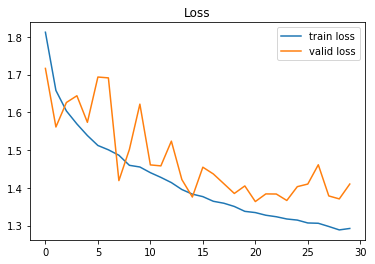

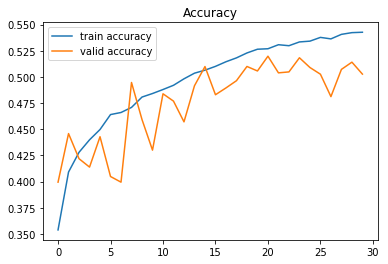



============== [ BATCH_SIZE = 32 ] ==============


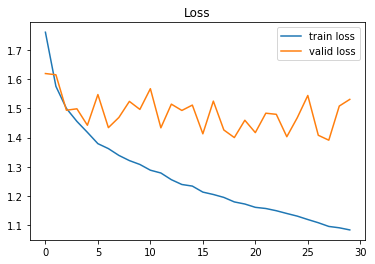

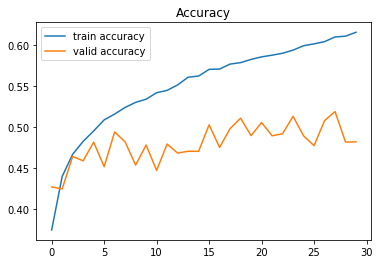



============== [ BATCH_SIZE = 128 ] ==============


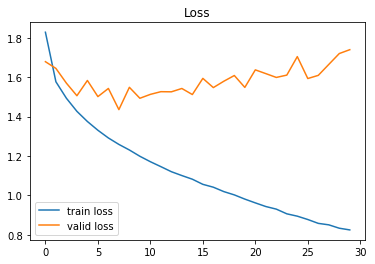

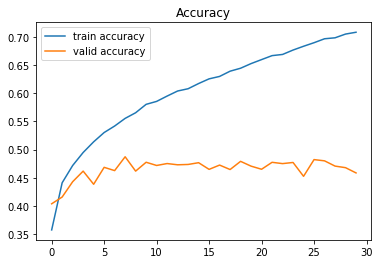



============== [ BATCH_SIZE = 256 ] ==============


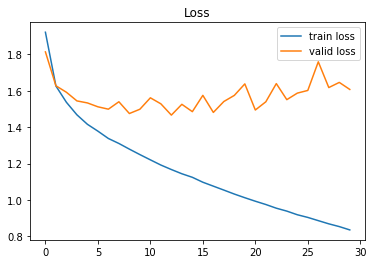

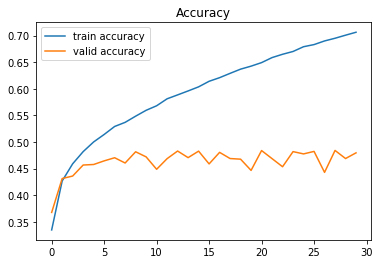

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
for key in results.keys():
    print("\n\n============== [ %s ] ==============" % key)
    result = results[key]
    plt.plot(range(len(result["loss"])), result["loss"], label="train loss")
    plt.plot(range(len(result["val_loss"])), result["val_loss"], label="valid loss")
    plt.legend()
    plt.title("Loss")
    plt.show()

    plt.plot(range(len(result["accuracy"])), result["accuracy"], label="train accuracy")
    plt.plot(range(len(result["val_accuracy"])), result["val_accuracy"], label="valid accuracy")
    plt.legend()
    plt.title("Accuracy")
    plt.show()